# Transfer Learning

In [4]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

In [ ]:
import sys
import tensorflow as tf
import tensorflow.keras as keras
print("Python version %s.%s.%s" % sys.version_info[:3])
print("Tensorflow version %s" % tf.__version__)
print("Keras version %s" % keras.__version__)

## Dataset

We use Kaggle's [Dog Breed Identification competition](https://www.kaggle.com/c/dog-breed-identification) as an example.

## Load Metadata

Use `pandas` to read (ID, labels) into `pandas.DataFrame`

In [5]:
import pandas as pd
labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


See label distribution

In [6]:
labels['breed'].value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
pomeranian                        111
great_pyrenees                    111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
cairn                             106
leonberg                          106
beagle                            105
japanese_spaniel                  105
miniature_pinscher                102
australian_terrier                102
blenheim_spaniel                  102
irish_wolfhound                   101
lakeland_terrier                   99
saluki                             99
papillon                           96
siberian_husky                     95
whippet                            95
norwegian_elkhound                 95
pug         

Here's a sample output, where each row is an image with uniform probability distribution among the 120 dog classes

In [7]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


Extract the column names, which are the classes

In [8]:
num_train_images = labels.shape[0]
print('num_train_images:', num_train_images)
breed = sample.columns[1:]
print('breed:', breed)
num_classes = len(breed)
print('num_classes:', num_classes)

num_train_images: 10222
breed: Index(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller', 'australian_terrier',
       'basenji', 'basset', 'beagle',
       ...
       'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner',
       'welsh_springer_spaniel', 'west_highland_white_terrier', 'whippet',
       'wire-haired_fox_terrier', 'yorkshire_terrier'],
      dtype='object', length=120)
num_classes: 120


Now, write a function that extracts images

In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_width = 224

def get_image(filename):
    ########################################################################
    # Your code here...
    original = load_img(filename, target_size=(img_width, img_width)) # image object
    numpy_image = img_to_array(original)
    return np.uint8(numpy_image)
    ########################################################################

## Load models

In [12]:
from tensorflow.keras.models import load_model
import tensorflow.keras.applications.resnet50 as resnet50

model = load_model('model1.h5') # load model from disk
model_resnet50 = resnet50.ResNet50(weights='imagenet', include_top=False) # pretrained model

/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


## Test

just on one image for simplicity

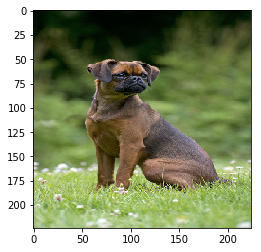

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

test_img = get_image('dog.jpg') # download another dog image and try it out
plt.imshow(test_img)
plt.show()

In [17]:
from tensorflow.keras.applications import resnet50

image_batch = np.expand_dims(test_img, axis=0)
image_batch = resnet50.preprocess_input(image_batch)

feature_input = model_resnet50.predict(image_batch)
predictions = model.predict(feature_input)

pos = np.argmax(predictions)
print(breed[pos])

predictions[0][pos] = 0
pos = np.argmax(predictions)
print(breed[pos])

predictions[0][pos] = 0
pos = np.argmax(predictions)
print(breed[pos])

predictions[0][pos] = 0
pos = np.argmax(predictions)
print(breed[pos])

predictions[0][pos] = 0
pos = np.argmax(predictions)
print(breed[pos])

brabancon_griffon
vizsla
rhodesian_ridgeback
staffordshire_bullterrier
american_staffordshire_terrier


In [ ]:
# THE END